In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import random



In [2]:
# read in the listings
listings_df = pd.read_csv("./Data/listings.csv")
listings_df.head()



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11551,Stylish and bright London apartment in Zone 2,43039,Adriano,NaN,Lambeth,51.46225,-0.11732,Entire home/apt,88,2,183,2018-08-22,1.65,2,290
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56802,-0.11121,Private room,65,1,14,2018-06-17,0.13,3,362
2,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,100,3,84,2019-04-22,0.74,1,155
3,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,NaN,Westminster,51.52098,-0.14002,Entire home/apt,300,3,40,2019-04-20,0.40,13,230
4,24328,Battersea bedroom & office w parking shared ga...,41759,Joe,NaN,Wandsworth,51.47298,-0.16376,Entire home/apt,175,30,92,2016-09-07,0.89,1,332


In [3]:
# read in the reviews
reviews_df = pd.read_csv("./Data/reviews.csv")
reviews_df['date'] = pd.to_datetime(reviews_df['date'])
reviews_df.head()


,listing_id,date
0,11551,2010-03-21
1,11551,2010-03-29
2,11551,2010-05-09
3,11551,2010-06-01
4,11551,2010-06-28


In [4]:
# filter dates 

start_date = '2018-01-01'
end_date = '2018-12-31'
mask = (reviews_df['date'] > start_date) & (reviews_df['date'] <= end_date)
reviews_df = reviews_df.loc[mask]
reviews_df = reviews_df.groupby('listing_id').count()
reviews_df.head()


,date
listing_id,
11551,7
13913,3
15400,3
17402,14
25023,6


In [5]:
# summary stats around each dataframe
print('--------------')
print('Review shape')
print(reviews_df.shape)

print('--------------')
print('Listing shape')
print(listings_df.shape)

print('--------------')
print('NANs in reviews')
print(reviews_df.isna().sum())

print('--------------')
print('NANs in listings')
print(listings_df.isna().sum())





--------------
Review shape
(41188, 1)
--------------
Listing shape
(80767, 16)
--------------
NANs in reviews
date    0
dtype: int64
--------------
NANs in listings
id                                    0
name                                 27
host_id                               0
host_name                            49
neighbourhood_group               80767
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       20573
reviews_per_month                 20573
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [6]:
# describe review
 
print(reviews_df.describe())




               date
count  41188.000000
mean      11.349034
std       14.649154
min        1.000000
25%        2.000000
50%        6.000000
75%       14.000000
max      197.000000


In [7]:
# describe listings
 
print(listings_df.describe())




                 id       host_id  neighbourhood_group      latitude  \
count  8.076700e+04  8.076700e+04                  0.0  80767.000000   
mean   2.009068e+07  7.365350e+07                  NaN     51.509442   
std    9.608593e+06  7.348884e+07                  NaN      0.046211   
min    1.155100e+04  2.010000e+03                  NaN     51.294790   
25%    1.307544e+07  1.377122e+07                  NaN     51.485300   
50%    2.118483e+07  4.236404e+07                  NaN     51.513820   
75%    2.831253e+07  1.251137e+08                  NaN     51.537260   
max    3.444359e+07  2.599774e+08                  NaN     51.681690   

          longitude         price  minimum_nights  number_of_reviews  \
count  80767.000000  80767.000000    80767.000000       80767.000000   
mean      -0.128137    118.321022        4.353189          16.104436   
std        0.092021    211.199175       22.311627          34.173312   
min       -0.496960      0.000000        1.000000           0.0

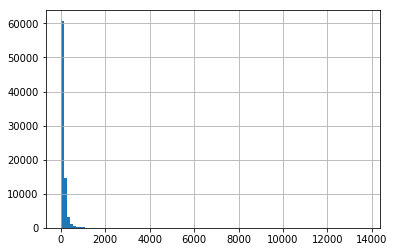

In [8]:
# distrbution of prices
listings_df['price'].hist(bins=100);



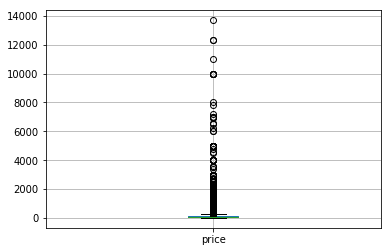

In [9]:
# box plot of prices
boxplot = listings_df.boxplot(column=['price'])



(array([8.0623e+04, 8.7000e+01, 2.1000e+01, 1.5000e+01, 5.0000e+00,
        7.0000e+00, 0.0000e+00, 5.0000e+00, 1.0000e+00, 3.0000e+00]),
 array([    0.,  1370.,  2740.,  4110.,  5480.,  6850.,  8220.,  9590.,
        10960., 12330., 13700.]),
 <a list of 10 Patch objects>)

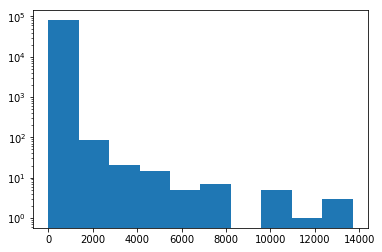

In [10]:
# distrbution of prices in log transform
plt.hist(listings_df['price'], log=True) 




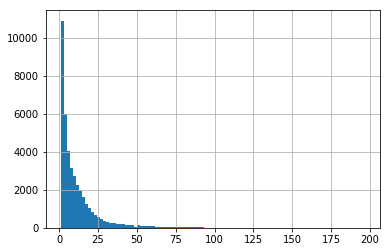

In [11]:
# distrbution of dates
reviews_df['date'].hist(bins=100);



In [12]:
# describe of dates
reviews_df['date'].describe()




count    41188.000000
mean        11.349034
std         14.649154
min          1.000000
25%          2.000000
50%          6.000000
75%         14.000000
max        197.000000
Name: date, dtype: float64

In [13]:
# merge listings and reviews
df = pd.merge(listings_df, reviews_df, left_on='id', right_on='listing_id')
df.head()




,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,date
0,11551,Stylish and bright London apartment in Zone 2,43039,Adriano,NaN,Lambeth,51.46225,-0.11732,Entire home/apt,88,2,183,2018-08-22,1.65,2,290,7
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56802,-0.11121,Private room,65,1,14,2018-06-17,0.13,3,362,3
2,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,100,3,84,2019-04-22,0.74,1,155,3
3,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,NaN,Westminster,51.52098,-0.14002,Entire home/apt,300,3,40,2019-04-20,0.40,13,230,14
4,25023,All-comforts 2-bed flat near Wimbledon tennis,102813,Amanda,NaN,Wandsworth,51.44687,-0.21874,Entire home/apt,65,4,27,2019-03-11,0.70,1,9,6


In [14]:
# check each id is unique - one row per id
print(len(df['id'].unique().tolist()))
print(df['id'].count())




41188
41188


In [15]:
# describe merged dfs
 
print(df.describe())




                 id       host_id  neighbourhood_group      latitude  \
count  4.118800e+04  4.118800e+04                  0.0  41188.000000   
mean   1.867687e+07  6.576282e+07                  NaN     51.509152   
std    8.465046e+06  6.563704e+07                  NaN      0.044945   
min    1.155100e+04  2.010000e+03                  NaN     51.294790   
25%    1.329791e+07  1.117368e+07                  NaN     51.486200   
50%    2.067337e+07  3.795253e+07                  NaN     51.513710   
75%    2.540276e+07  1.129129e+08                  NaN     51.535420   
max    3.120145e+07  2.416394e+08                  NaN     51.679200   

          longitude         price  minimum_nights  number_of_reviews  \
count  41188.000000  41188.000000    41188.000000       41188.000000   
mean      -0.129145    105.924565        4.025833          28.845076   
std        0.090371    150.092166       25.444193          43.535392   
min       -0.496960      0.000000        1.000000           1.0

In [16]:
# Percentage of dates compared to availablity
def check_dates(df):
    """
    This function checks if the number of dates the property was 
    used went over the availability. If so then it changes the availability 
    of the property to 365.
    Args:
    - df (pandas dataframe)
    Return:
    - returns column availability_365 results 
    """
    if (df['date'] > df['availability_365'] ):
        return 365
    elif (df['date'] <= df['availability_365'] ):
        return df['availability_365'] 

df = df[(df[['availability_365']] != 0).all(axis=1)]
df['availability_365'] = df.apply(check_dates, axis = 1)

df['useage'] = df['date']/df['availability_365'] * 100
df['useage'].head()








0     2.413793
1     0.828729
2     1.935484
3     6.086957
4    66.666667
Name: useage, dtype: float64

In [17]:
# describe useage of properties

print(df.useage.describe())

print('--------------')
print('NANs in df')
print(df.isna().sum())

print('--------------')
print('mean of usage')
print(df.useage.mean())

print('--------------')
print('median of usage')
print(df.useage.median())




count    31643.000000
mean        12.712029
std         18.691557
min          0.273973
25%          1.818182
50%          5.263158
75%         14.516129
max        100.000000
Name: useage, dtype: float64
--------------
NANs in df
id                                    0
name                                  0
host_id                               0
host_name                            18
neighbourhood_group               31643
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
date                                  0
useage                                0
dtype: int64
--------------
mean of usage
12.7120

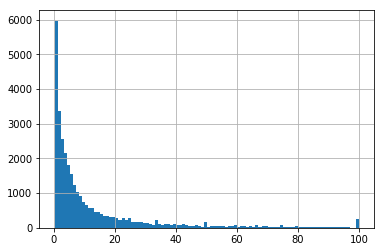

In [18]:
# distrbution of useage
df['useage'].hist(bins=100)




35363342.0
count     31643.000000
mean       1117.572354
std        2062.146941
min           0.000000
25%         220.500000
50%         600.000000
75%        1440.000000
max      223040.000000
Name: income, dtype: float64


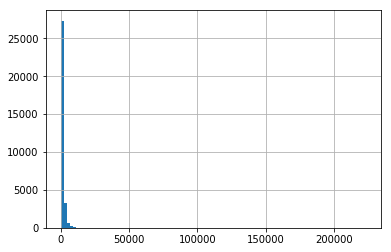

In [19]:
# How much income was generated 
df['income'] = df['price'] * df['useage']/100 * df['availability_365']
print(df['income'].sum())

df['income'].hist(bins=100);
print(df['income'].describe())





In [20]:
# monte-carlo simulation of income generated
def get_rand_number():
    """
    This function generates a random number between 1 and 100
    Return:
    - Random number (float)
    """
    roll = random.randint(1,100)
    roll = roll/100
    return roll

def monte_carlo_sim(df, prob = 0.2, number_sim = 1000):
    """
    This function generates a random number between 1 and 100
    Return:
    - Random number (int)
    """
    x = 0
    final_income = []
    while x < number_sim:  
        income_iter = 0      
        for index, row in df.iterrows():
            result = get_rand_number()
            if(result <= prob):
                income = row['price'] * row['availability_365'] * prob
                income_iter += income
        final_income.append(income_iter)
        x+=1 # increase the count
    return final_income


sim_outputs = monte_carlo_sim(df, prob = 0.25, number_sim = 10)
print(sim_outputs)


		



[42817073.5, 40845798.0, 40222924.0, 41069535.75, 44250361.25, 41705674.5, 44063703.75, 41580914.25, 42950236.75, 43539689.5]
